# ColorMap
カラーマップの表示および点の打点を行う

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
class ColorMap:
    def __init__(self, func, x1_range, x2_range, width, height):
        self.func = func
        self.x1_range = x1_range
        self.x2_range = x2_range
        self.width = width
        self.height = height

    def generate_coordinate(self):
#         plt.xlim(*self.x1_range)
#         plt.ylim(*self.x2_range)
        self.x1_coord = self._map_func(np.array(list(range(self.width))), 0, self.width - 1, self.x1_range[0], self.x1_range[1])
        self.x2_coord = self._map_func(np.array(list(range(self.height))), 0, self.height - 1, self.x2_range[0], self.x2_range[1])
        
        points = np.array([self.func(x1, x2) for x2 in self.x2_coord for x1 in self.x1_coord ])
        self.points = points.reshape(self.width, self.height)
        
        
    def draw_map(self):
        ax = plt.subplot(111)
        im = ax.imshow(self.points, extent=(self.x1_coord[0], self.x1_coord[-1], self.x2_coord[0], self.x2_coord[-1]))
        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        plt.colorbar(im, cax=cax)

        
    # 範囲変更関数
    @staticmethod
    def _map_func(value, start1, stop1, start2, stop2):
        return start2 + (stop2 - start2) * ((value - start1) / (stop1 - start1))

In [3]:
sqrt_2 = math.sqrt(2)
def griewank_function(x1, x2):
    return (x1 ** 2 + x2 ** 2)/4000.0 - math.cos(x1) * math.cos(x2 / sqrt_2) + 1.0

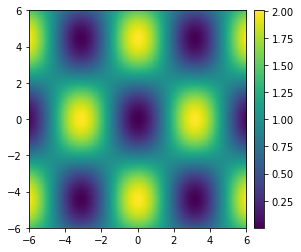

In [4]:
# DEBUG
cm =  ColorMap(griewank_function, [-6, 6], [-6, 6] ,400, 400)
cm.generate_coordinate()
cm.draw_map()